# Numerical methods for ODEs

## Learning objectives:

* Learn some common methods: Forward/Explicit Euler, Backward/Implicit Euler, Runge-Kutta, and Leap-Frog methods
    * Get an idea how these methods are derived from: interpolation, quadrature rules and direct finite differencing
* Learn five very important concepts:

    * **Well-posedness** of an initial-value problem (independent of numerical methods)
    * **Consistency** of a numerical method to the differential equation
    * **Stability** of a numerical method
    * **Convergence** of numerical solution computed by a numerical method to the analytical solutions of the ODEs
    * The order of a numerical method and *local truncation error* 
    
These concepts will be discussed using the model linear problem
$$ \frac{dy}{dt}=\lambda y,\,\,\, y(0)=y_0 $$
with $\lambda=a+b i$ being a complex number. 

An important factor is the sign of $a$, whetehr is is negative, zero or positive.


* Learn as a fact: ** For a wellposed problem, consistency + stability (of the numerical method) $\iff$ convergence **

* Know how to use Julia's DifferentialEquations package

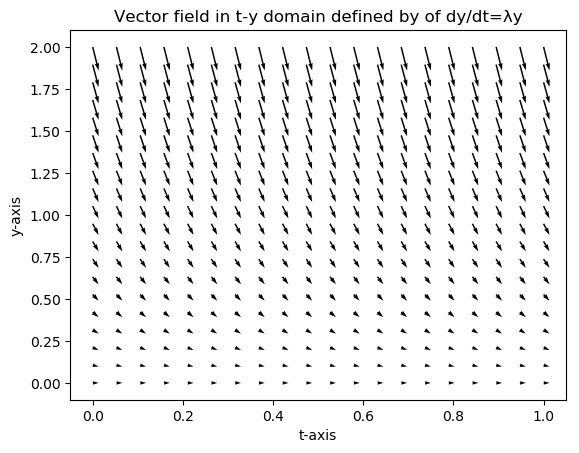

PyObject Text(0.5,1,u'Vector field in t-y domain defined by of dy/dt=\u03bby')

In [68]:
t=linspace(0,1,20)
y=linspace(0,2,20)

tgrid=repmat(t', length(y), 1)
ygrid=repmat(y, 1, length(t))

λ=-2.0

dy=λ.*ygrid
dt=ones(size(dy))
    
using PyPlot

quiver(tgrid,ygrid, dt,dy)
xlabel("t-axis")
ylabel("y-axis")
title("Vector field in t-y domain defined by of dy/dt=λy")

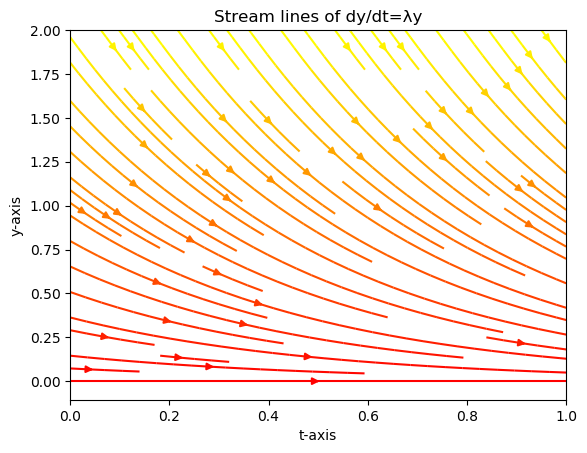

PyObject Text(0.5,1,u'Stream lines of dy/dt=\u03bby')

In [69]:
streamplot(tgrid, ygrid, dt,dy, color=ygrid, cmap=PyPlot.cm[:autumn])
xlabel("t-axis")
ylabel("y-axis")
title("Stream lines of dy/dt=λy")

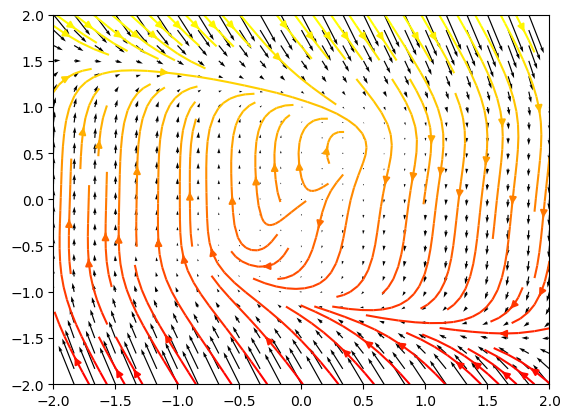

PyObject <matplotlib.streamplot.StreamplotSet object at 0x1387cc850>

In [73]:
N=25
x=linspace(-2,2,N)
y=linspace(-2,2,N)

xgrid=repmat(x', length(y), 1)
ygrid=repmat(y, 1, length(x))

quiver(xgrid,ygrid,-1.0-xgrid+8ygrid.^3,(-xgrid+ygrid-ygrid.^3)/0.05)
streamplot(xgrid,ygrid,-1.0-xgrid+8ygrid.^3,(-xgrid+ygrid-ygrid.^3)/0.05, color=ygrid, cmap=PyPlot.cm[:autumn])

### Solutions of the differential equation 

* They are curves that the streamlines (aka integral curves) shown above
* The slope of the streamlines are prescibed by the right hand side of the differential equation.
* By prescribing an initial condition, e,g, $y(0.0)=0.5$, one picks out a *unique* streamline=solution. 

## Euler's methods 

Differential equation: $\frac{dy}{dt}=f(t,y)$

$t_{n+1}=t_n+\Delta t$. We call $\Delta t$ the step size

The Forward-Euler method: $y(t_n)\approx y_n$, $y(t_{n+1})\approx y_{n+1}$

$$\frac{dy}{dt}(t_n) = f(t_n, y(t_n)) \approx \frac{y_{n+1}-y_n}{\Delta t}=f(t_n, y_n)$$

The Backward-Euler method: $y(t_n)\approx y_n$, $y(t_{n+1})\approx y_{n+1}$

$$\frac{dy}{dt}(t_{n+1}) = f(t_{n+1}, y(t_{n+1})) \approx \frac{y_{n+1}-y_n}{\Delta t}=f(t_{n+1}, y_{n+1})$$



In [1]:
#implements forward-euler method for dy/dt= f(t,y), with the prescibed step size Δt
function FEstep(tn, yn, f, Δt)
    yn+Δt*f(tn,yn)  # y(n+1)=yn+Δt*f(tn,yn)
end

function BEstep(tn, yn, f, Δt)
   #Need to solve the following equation: y(n+1) - Δtf(tn+Δt, y(n+1))=yn  
end

function BE_model_step(tn, yn, λ, Δt) #assume that f(t,y)=λy
   yn/(1.0-Δt*λ) 
end

BE_model_step (generic function with 1 method)

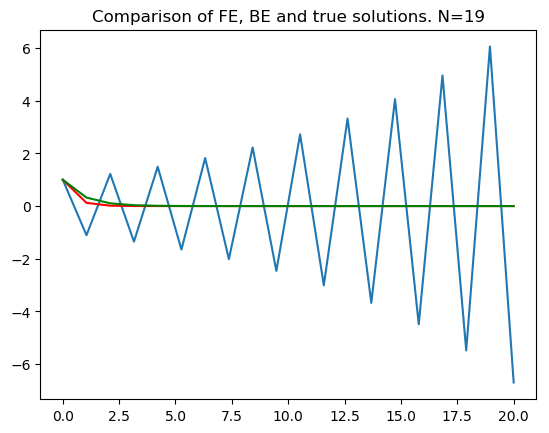

PyObject Text(0.5,1,u'Comparison of FE, BE and true solutions. N=19')

In [18]:
λ=-2.0


f(t,y)=λ*y


N=19
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y_fe=zeros(Complex, N+1)

#prescribe an initial condition
Y_fe[1]= 1.0

Y_be=copy(Y_fe)

for n=1:N
    Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
    Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y_fe[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y_fe))
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=19")

In [ ]:
λ=-2.0

f(t,y)=λ*y

N=19
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y_fe=zeros(Complex, N+1)

#prescribe an initial condition
Y_fe[1]= 1.0

Y_be=copy(Y_fe)

for n=1:N
    Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
    Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y_fe[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y_fe))
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=19")

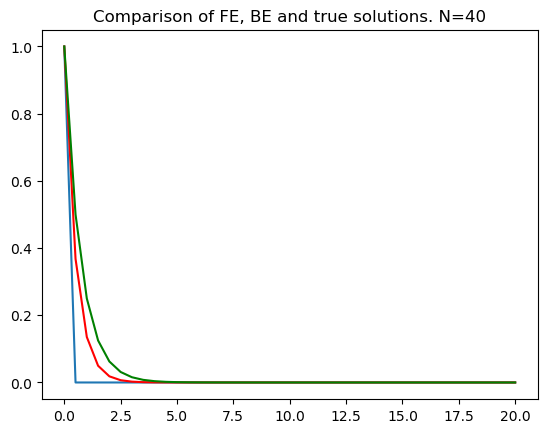

PyObject Text(0.5,1,u'Comparison of FE, BE and true solutions. N=40')

In [8]:
N=40
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y_fe=zeros(Complex, N+1)

#prescribe an initial condition
Y_fe[1]= 1.0

Y_be=copy(Y_fe)

for n=1:N
    Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
    Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y_fe[1]).*exp.(λ.*tspan)
using PyPlot

plot(tspan, real.(Y_fe))
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=40")

#### Stability of FE and BE

* Observe the flip in stabiilty of FE from $N=39$ to $N=40$.

* Observe that BE sotluon is ALWAYS "exponentially" decaying and stable: 
    * Notice that the backward Euler schme for the model equation is 
        $y_{n+1} = 1/(1-\lambda\Delta t) y_n$,
        
        **For $\lambda<0$, the factor $0<1/(1-\lambda\Delta t)<1$, so $|y_{n+1}|<|y_n|, n=0,1,2,\cdots$.**

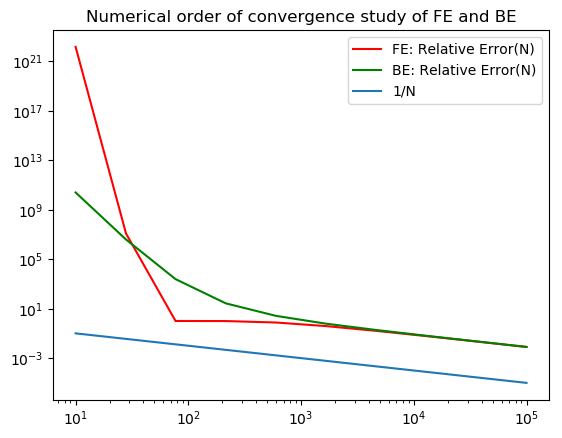

PyObject Text(0.5,1,u'Numerical order of convergence study of FE and BE')

In [13]:
N=round.(Int,logspace(1,5,10))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err_fe=zeros(length(N))  # we will fill this Vector with the errors
err_be=zeros(length(N))

y0=1.0

for k=1:length(N)
    tspan=linspace(0,20,N[k]+1)

    #step size
    Δt=tspan[end]/N[k]

    Y_fe=zeros(Complex, N[k]+1)

    #prescribe an initial condition
    Y_fe[1]= y0

    Y_be=copy(Y_fe)

    for n=1:N[k]
        Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
        Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
    end

    trueY=real.(y0).*exp.(λ.*tspan)

    err_fe[k]=abs.( Y_fe[end]-trueY[end])./trueY[end]
    err_be[k]=abs.( Y_be[end]-trueY[end])./trueY[end]
end

fig, ax = subplots()

ax[:loglog](N,err_fe, "r", label="FE: Relative Error(N)") 
ax[:loglog](N,err_be, "g", label="BE: Relative Error(N)") 

ax[:legend](loc="upper right")

ax[:loglog](N,1./N, label="1/N")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")

title("Numerical order of convergence study of FE and BE")

### Now experiment with purely imaginary $\lambda$

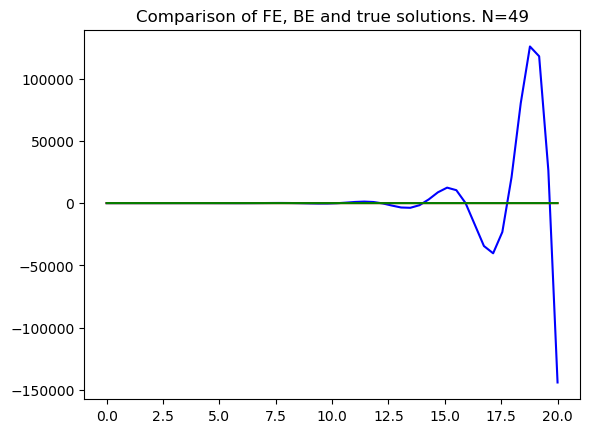

PyObject Text(0.5,1,u'Comparison of FE, BE and true solutions. N=49')

In [26]:
λ=2.0im


f(t,y)=λ*y


N=49
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y_fe=zeros(Complex, N+1)

#prescribe an initial condition
Y_fe[1]= 1.0

Y_be=copy(Y_fe)

for n=1:N
    Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
    Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
end

trueY=real.(Y_fe[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y_fe),"b")
plot(tspan, real.(trueY),"r")
plot(tspan, real.(Y_be),"g")

title("Comparison of FE, BE and true solutions. N=49")

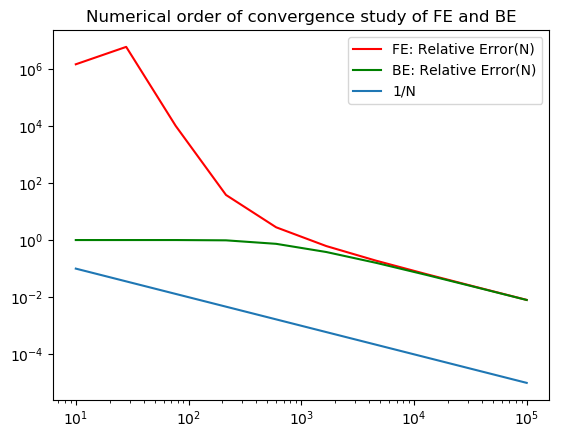

PyObject Text(0.5,1,u'Numerical order of convergence study of FE and BE')

In [30]:
N=round.(Int,logspace(1,5,10))   # create 100 logarithmically spaced n's between 10^1 and 10^5

err_fe=zeros(length(N))  # we will fill this Vector with the errors
err_be=zeros(length(N))

y0=1.0im

for k=1:length(N)
    tspan=linspace(0,20,N[k]+1)

    #step size
    Δt=tspan[end]/N[k]

    Y_fe=zeros(Complex, N[k]+1)
    trueY=copy(Y_fe)
    
    #prescribe an initial condition
    Y_fe[1]= y0

    Y_be=copy(Y_fe)

    for n=1:N[k]
        Y_fe[n+1]=FEstep(tspan[n], Y_fe[n], f, Δt)
        Y_be[n+1]=BE_model_step(tspan[n], Y_be[n], λ, Δt)
    end

    trueY=(y0).*exp.(λ.*tspan)

    err_fe[k]=abs( Y_fe[end]-trueY[end])/abs(trueY[end])
    err_be[k]=abs( Y_be[end]-trueY[end])/abs(trueY[end])
end

fig, ax = subplots()

ax[:loglog](N,err_fe, "r", label="FE: Relative Error(N)") 
ax[:loglog](N,err_be, "g", label="BE: Relative Error(N)") 

ax[:legend](loc="upper right")

ax[:loglog](N,1./N, label="1/N")  # reveals a curve that decreases with rate proportional to 1/N^2; first order convergence
ax[:legend](loc="upper right")

title("Numerical order of convergence study of FE and BE")

#### Observe that the errors of BE stays "flat" until $N>10^3$. Why?

## Multistep methods

### The Leap-frog scheme

$$\frac{y_{n+1}-y_{n-1}}{\Delta t} = f(t_n y_n) $$

In [13]:
function LF(y_prev, yn, tn, f, Δt)
    #the value of y(n+1) =
    y_prev+Δt*f(tn, yn) #y_prev = y(n-1)
end

LF (generic function with 1 method)

In [ ]:
f(t,y)=λ*y

λ=-2.0

N=6*10
tspan=linspace(0,20,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(Complex, N+1)

#prescribe an initial condition
Y[1]= 1.0
Y[2]= #Use an Euler's method to approximate Y[2]

for n=2:N
    Y[n+1]=LF(Y[n-1], Y[n], tspan[n], f, Δt)
end

trueY=real.(Y[1]).*exp.(λ.*tspan)

using PyPlot

plot(tspan, real.(Y))
plot(tspan, real.(trueY),"r")


## Runge-Kutta methods

### Mid-point rule


* Is a type of second order accurate Runge-Lutta methods
* Comes from the Trapezoidal rule.
  
  $$\frac{y_{n+1}-y_n}{\Delta t} = \frac{1}{2}\left( f(t_n,y_n) + f(t_n, y_{n+1}^* \right)$$
  $$y_{n+1}^*:=y_n + \Delta t f(t_n,y_n)$$
  

In [ ]:
function RK2(tn,yn, f, Δt)
   #To be filled in in class 
   k0= f(tn, yn)
   y1=yn+Δt*f*k0
   
   k1= f(tn+Δt, y1) 

   #y(n+1)=
   yn+0.5*(k0+k1)*Δt
end

## Consistency

A scheme (numerical method) is consistent to the differential equation if the scheme converges to the differential equation as the step size, $h$, goes to zero.

* General procedure: plug in the analytical solution $y(t)$ into the nuemrical method, 
    * use Taylor's expansion
    * use the fact that $y'=f(t,y)$ 
   and determine the term that describes the discrepancy; that is, how $y(t)$ does not satisfy the nuemrical scheme.
   
    * This discrepancy is called the **local truncation error** (LTE).



* If LTE=$\mathcal{O}(\Delta t^{p+1}), p>0$, we say that
   * The numerical method is **consistent**
   * The numerical method is $p$-th order accurate.

### A worked example



We consider the ODE $$ y^\prime = f(y)$$ and the Backward Euler scheme $$y_{n+1} = y_n +\Delta t f(y_{n+1}).$$

$t_{n+1}=t_n+\Delta t.$

Let $y(t)$ be an analytical solution of the ODE.

Replace in the scheme $y_{n+1}$ by $y(t_{n+1})$ and $y_n$ by $y(t_n)$. We expect that $y(t)$ does not satisfies the nuemrical scheme, and there is a dsicrepany:

$$y(t_{n+1}) = y(t_n) +\Delta t f(y(t_{n+1}))+LTE,$$ 
where the discrepancy is denoted by $LTE$, and is called **the local truncation error** of the scheme.

For Backward Euler, we use Taylor expansion of $y(t)$ around $t_{n+1}$. 

This means $y(t_n) = y(t_{n+1}-\Delta t) = y(t_{n+1}) - \Delta t y^\prime (t_{n+1}) + \frac{1}{2}\Delta t^2 y"(t_{n+1}) + \mathcal{O}(\Delta t^3). $

Thus, we have $$y(t_{n+1}) =  \left( y(t_{n+1}) - \Delta t y^\prime (t_{n+1}) + \frac{1}{2}\Delta t^2 y"(t_{n+1}) + \mathcal{O}(\Delta t^3)\right) +\Delta t f(y(t_{n+1}))+LTE.$$ 

But since $y(t)$ satisfies the ODE, $y^\prime(t_{n+1}) = f(y(t_{n+1}))$.

So $$y(t_{n+1}) =  \left( y(t_{n+1}) - \Delta t f(y(t_{n+1})) + \frac{1}{2}\Delta t^2 y"(t_{n+1}) + \mathcal{O}(\Delta t^3)\right) +\Delta t f(y(t_{n+1}))+LTE.$$ 

In other words, $$LTE=\frac{1}{2}\Delta t^2 y"(t_{n+1}) + \mathcal{O}(\Delta t^3)=\mathcal{O}(\Delta t^2),$$ assuming that the derivatives of the solution $y(t)$ stays bounded for $n=0,1,2,...$.


## Stability and the accumulation of LTEs as we step in time

As we step in time, from $y_n$ to $y_{n+1}$, and $n=0,1,2,\cdots$, in each step, the local truncation error is equivalent to the error committed by the numerical scheme, and will accumulate.

From above, we can derive an equation for the error $e_n:= y(t_n)-y_n$: 
Since 
$$y_{n+1} = y_n +\Delta t f(y_{n+1}),$$ and 
$$y(t_{n+1}) = y(t_n) +\Delta t f(y(t_{n+1}))+LTE,$$
we have
$$ e_{n+1}:= e_n +\Delta t \left(f(y(t_{n+1}))-f(y_{n+1})\right)+LTE. $$

We consider the model equation $y^\prime =\lambda y$. 

then the error equation becomes: 
$$ e_{n+1}= e_n +\Delta t \lambda e_{n+1} +LTE \iff e_{n+1} = \frac{1}{1-\lambda\Delta t} e_n + \frac{1}{1-\lambda\Delta t} LTE$$

And $$ |e_{n+1}|\le |\frac{1}{1-\lambda\Delta t}|\,|e_n|+|\frac{1}{1-\lambda\Delta t}|\cdot |LTE|. $$

Iterating on this relation, we have 

$$ |e_{n}|\le |\frac{1}{1-\lambda\Delta t}|^n\,|e_0|+\left(|\frac{1}{1-\lambda\Delta t}|+|\frac{1}{1-\lambda\Delta t}|^2+\cdots+|\frac{1}{1-\lambda\Delta t}|^n\right) \max|LTE|. $$

**The accumulation of the LTE depends on $|\frac{1}{1-\lambda\Delta t}|$.**

If $|\frac{1}{1-\lambda\Delta t}|>1$, the error will blow up as $n$ increases!

In other words, convergence of the scheme depends on 

1. $|\frac{1}{1-\lambda\Delta t}|\le 1$ (stability)
2. LTEs are small enough so they won't accumulate to be too big (consistency).

## Some nonlinear examples

#### A relaxation oscillator

$$\frac{dx}{dt}=-1-x-8y^3$$
$$\frac{dy}{dt}=(-x+y-y^3)/\nu$$

Let's try to solve this with a good solver from a Julia package.
Let's also try to solve this with our Euler's schemes.

* For the implicit Euler scheme, how should one solve the nonlinear equations?

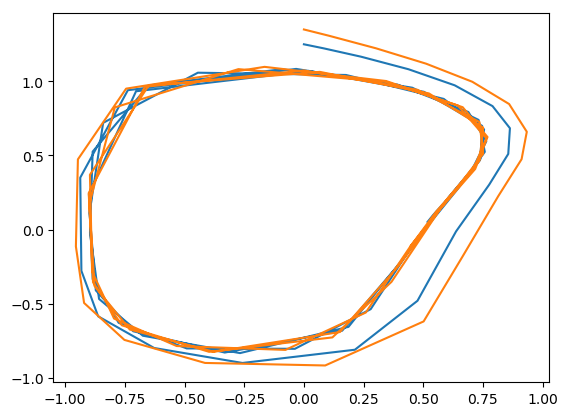

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13d4edb90>

In [20]:
using DifferentialEquations

function RelaxOsc(t, u, du)
    
    ν=0.15
    x,y=u[1], u[2]    

    du[1]=-1.0-x+8y.^3
    du[2]=(-x+y-y.^3)/ν
end

u0=[0.0; 1.25]
tspan=(0.0, 5.0)

prob1=ODEProblem(RelaxOsc, u0, tspan)
sol1=solve(prob1)

v0=[0.0; 1.25+0.1]

prob2=ODEProblem(RelaxOsc, v0, tspan)
sol2=solve(prob2)

using PyPlot
plot( sol1[1,:], sol1[2,:])
plot( sol2[1,:], sol2[2,:])


#using Plots

#plot( sol1, vars=(1,2))
#plot( sol2, vars=(1,2))

In [24]:
size(sol1)

(2, 66)

In [6]:
function RelaxOsc(t, u)
    
    ν=0.15
    x,y=u[1], u[2]    

    [-1.0-x+8y.^3;(-x+y-y.^3)/ν]
end

RelaxOsc (generic function with 2 methods)

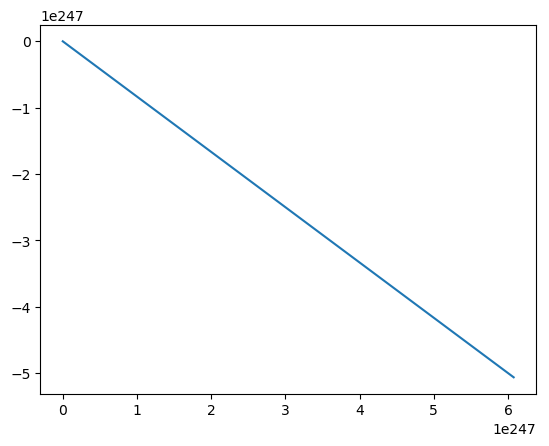

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13de83610>

In [27]:
N=66
tspan=linspace(0,5,N+1)

#step size
Δt=tspan[end]/N

Y=zeros(2,N+1)

#prescribe an initial condition
Y[:,1]= u0

for n=1:N
    Y[:,n+1]=FE(tspan[n], Y[:,n], RelaxOsc, Δt)
end

plot( Y[1,:], Y[2,:])

#### Volterra-Lotka equations

This is a prototype of a "predator-Prey" model used in biological problems alot.

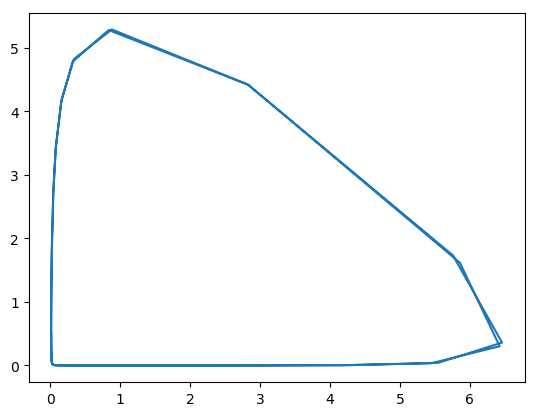

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13cc91a50>

In [5]:
using DifferentialEquations


function VolterraLotka(t, u, du)
    
    ν=0.5
    x,y=u[1], u[2]    

    du[1]=x*(1.0-y/ν)
    du[2]=y*(x-1.0)/ν
end

u0=[0.01; 0.5]
tspan=(0.0, 20.0)

prob=ODEProblem(VolterraLotka, u0, tspan)
sol=solve(prob)

plot( sol[1,:], sol[2,:])
#plot( sol1[1,:], sol1[2,:])